In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

In [2]:
class NeuralNetworks:
    def __init__(self,input_size,hidden_size,output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.w1 = np.random.randn(hidden_size,input_size)*0.01
        self.b1 = np.zeros((hidden_size,1))
        self.w2 = np.random.randn(output_size,hidden_size)*0.01
        self.b2 = np.zeros((output_size,1))
    def forward_propagation(self,x):
        self.z1 = np.dot(self.w1,x)+self.b1
        self.a1 = np.tanh(self.z1)
        self.z2 = np.dot(self.w2,self.a1)+self.b2
        self.a2 = self.sigmoid(self.z2)
        return self.a2
    def backward_propagation(self,x,y):
        m = x.shape[1]
        dz2 = self.a2-y
        dw2 = (1/m)*np.dot(dz2,self.a1.T)
        db2 = (1/m)*np.sum(dz2,axis=1,keepdims=True)
        dz1 = np.dot(self.w2.T,dz2)*(1-np.power(self.a1,2))
        dw1 = (1/m)*np.dot(dz1,x.T)
        db1 = (1/m)*np.sum(dz1,axis=1,keepdims=True)
        self.w2-=dw2
        self.b2-=db2
        self.w1-=dw1
        self.b1-=db1
    def train(self,x,y,num_epochs,learning_rate):
        for epoch in range(num_epochs):
            predictions=self.forward_propagation(x)
            loss=self.cross_entropy_loss(y,predictions)
            self.backward_propagation(x,y)
            if epoch % 100==0:
                print(f"Epoch {epoch},Loss: {loss}")
    def sigmoid(self,z):
        return 1/(1+np.exp(-z))
    def cross_entropy_loss(self,y,a):
        m = y.shape[1]
        return -(1/m)*np.sum(y*np.log(a)+(1-y)*np.log(1-a))

Text(0.5, 1.0, 'Planar Data classification Dataset')

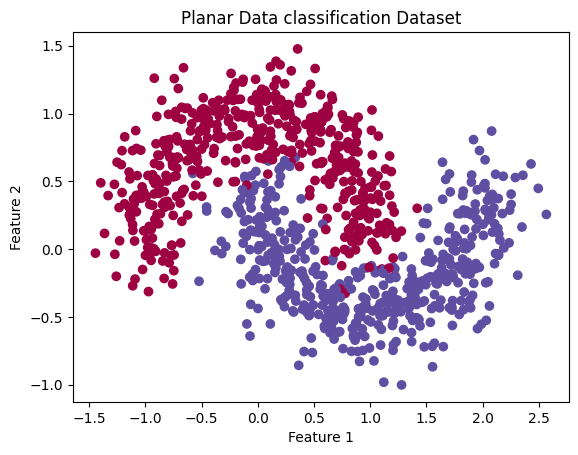

In [3]:
x,y=make_moons(n_samples=1000,noise=0.2,random_state=42)
x=x.T
y=y.reshape(1,-1)
plt.scatter(x[0,:],x[1,:],c=y.ravel(),cmap=plt.cm.Spectral) #scatter plot
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title('Planar Data classification Dataset')

In [4]:
input_size=2
hidden_size=4
output_size=1
model=NeuralNetworks(input_size,hidden_size,output_size)
model.train(x,y,num_epochs=1000,learning_rate=0.01)

Epoch 0,Loss: 0.6931398918101689
Epoch 100,Loss: 0.2914747821640608
Epoch 200,Loss: 0.290119787862437
Epoch 300,Loss: 0.2893536727484522
Epoch 400,Loss: 0.2888630689327727
Epoch 500,Loss: 0.2885164562778816
Epoch 600,Loss: 0.28825462088021303
Epoch 700,Loss: 0.28804779466483144
Epoch 800,Loss: 0.28787923611981103
Epoch 900,Loss: 0.2877386177135883
